In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load data and merge useful df


In [4]:
# load all data
user_test= pd.read_table('ua.test', header=None,names=['user_id','item_id','rating','timestamp'])
user_train = pd.read_table('ua.train', header=None,names=['user_id','item_id','rating','timestamp'])
item = pd.read_table('u.item', header=None,names=['movie_id' , 'movie_title' , 'release_date' , 'video_release_date',
              'IMDb_URL' , 'unknown' , 'Action' , 'Adventure' , "Animation" ,\
              "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,\
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,\
              'Thriller' , 'War' , 'Western'],sep='|',encoding='latin-1')
genre = pd.read_table('u.genre', header=None,names=['genre', 'genre_id'],sep='|')
user = pd.read_table('u.user', header=None,names=['user_id', 'age','gender','occupation','zip_code'],sep='|')
#full_userdata = pd.read_table('u.data', header=None,names=['user_id','item_id','rating','timestamp'])

In [5]:
# drop item column 'video_release_date' as it is emtpy
item = item.drop(['video_release_date'],axis=1)

In [6]:
# merge user and item details
user_item_train = pd.merge(user_train, user, left_on='user_id', right_on='user_id')
user_item_test = pd.merge(user_test, user, left_on='user_id', right_on='user_id')

user_item_train = pd.merge(user_item_train, item, left_on='item_id', right_on='movie_id')
user_item_train = user_item_train.drop(['movie_id'], axis=1)
user_item_test = pd.merge(user_item_test, item, left_on='item_id', right_on='movie_id')
user_item_test = user_item_test.drop(['movie_id'], axis=1)

# Explore data

In [7]:
full_userdata = pd.concat([user_item_train,user_item_test])
print(full_userdata.info())
full_userdata.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 9429
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       100000 non-null  int64 
 1   item_id       100000 non-null  int64 
 2   rating        100000 non-null  int64 
 3   timestamp     100000 non-null  int64 
 4   age           100000 non-null  int64 
 5   gender        100000 non-null  object
 6   occupation    100000 non-null  object
 7   zip_code      100000 non-null  object
 8   movie_title   100000 non-null  object
 9   release_date  99991 non-null   object
 10  IMDb_URL      99987 non-null   object
 11  unknown       100000 non-null  int64 
 12  Action        100000 non-null  int64 
 13  Adventure     100000 non-null  int64 
 14  Animation     100000 non-null  int64 
 15  Children's    100000 non-null  int64 
 16  Comedy        100000 non-null  int64 
 17  Crime         100000 non-null  int64 
 18  Documentary   100000 non-n

,user_id,item_id,rating,timestamp,age,gender,occupation,zip_code,movie_title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,5,874965758,24,M,technician,85711,Toy Story (1995),01-Jan-1995,...,0,0,0,0,0,0,0,0,0,0
1,2,1,4,888550871,53,F,other,94043,Toy Story (1995),01-Jan-1995,...,0,0,0,0,0,0,0,0,0,0
2,6,1,4,883599478,42,M,executive,98101,Toy Story (1995),01-Jan-1995,...,0,0,0,0,0,0,0,0,0,0
3,10,1,4,877888877,53,M,lawyer,90703,Toy Story (1995),01-Jan-1995,...,0,0,0,0,0,0,0,0,0,0
4,13,1,3,882140487,47,M,educator,29206,Toy Story (1995),01-Jan-1995,...,0,0,0,0,0,0,0,0,0,0


In [8]:
full_userdata.describe()

,user_id,item_id,rating,timestamp,age,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,100000.00000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.0000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860,8.835289e+08,32.969850,0.0001,0.255890,0.137530,0.036050,0.071820,...,0.013520,0.017330,0.053170,0.049540,0.052450,0.194610,0.12730,0.21872,0.093980,0.018540
std,266.61442,330.798356,1.125674,5.343856e+06,11.562623,0.0100,0.436362,0.344408,0.186416,0.258191,...,0.115487,0.130498,0.224373,0.216994,0.222934,0.395902,0.33331,0.41338,0.291802,0.134894
min,1.00000,1.000000,1.000000,8.747247e+08,7.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,254.00000,175.000000,3.000000,8.794487e+08,24.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
50%,447.00000,322.000000,4.000000,8.828269e+08,30.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
75%,682.00000,631.000000,4.000000,8.882600e+08,40.000000,0.0000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
max,943.00000,1682.000000,5.000000,8.932866e+08,73.000000,1.0000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000


In [9]:
user_item_train['zip_code'].unique()
#notice random zip code such as V3N4P

array(['85711', '94043', '98101', '90703', '29206', '97301', '10309',
       '37212', '95660', '30068', '48197', '55107', '21044', '54467',
       '80525', '17870', '20854', '46260', '50233', '76111', '66315',
       '84010', '52246', '08403', '97214', '75240', '43202', '48118',
       '60067', '73034', '41850', '08816', '29379', '03755', '21218',
       '22902', '44133', '55369', '68106', '23112', '71457', '75206',
       '98006', '63129', '05146', '30220', '55125', '63130', '16125',
       '06260', '99603', '60615', '22202', '20009', '60115', '80236',
       '84408', '53211', '36117', '20910', 'V3N4P', '48103', '70808',
       '27606', '66215', '15610', '80127', '52302', '19104', '49512',
       '33884', '76013', '95014', '49931', '02154', '55414', '17604',
       '93402', 'E2A4H', '60201', '32301', '10960', '85710', '03060',
       '55345', '02215', '27502', '47906', '14476', '01080', '94702',
       '22973', '28734', '37235', '84103', '95110', '85032', '07733',
       '22903', '426

# Feature Engineering

In [10]:
user_item_train['like'] = user_item_train['rating'].map(lambda x : 1 if x >= 4 else 0)
user_item_test['like'] = user_item_test['rating'].map(lambda x : 1 if x >= 4 else 0)

#drop rating
user_item_train = user_item_train.drop(['rating'],axis = 1)
user_item_test = user_item_test.drop(['rating'],axis = 1)

#drop NA rows as the amount is small, thus insignificant
user_item_train = user_item_train.dropna()
user_item_test = user_item_test.dropna()

#categorize zip code based on the first digit, which focus on the country region 
user_item_train['country_region'] = user_item_train['zip_code'].str[:1]
# for invalid zipcode
user_item_train['country_region'] = user_item_train['country_region'].map(lambda x: x if x.isnumeric() else None)
user_item_train['country_region'].fillna(value = user_item_train['country_region'].mode()[0],  inplace=True )


user_item_test['country_region'] = user_item_train['zip_code'].str[:1]
# for invalid zipcode
user_item_test['country_region'] = user_item_test['country_region'].map(lambda x: x if x.isnumeric() else None)
user_item_test['country_region'].fillna(value = user_item_test['country_region'].mode()[0],  inplace=True )

#categorize age
def age_cate(age):
    if age < 17:
        return 'Children'
    elif age < 31:
        return 'Young Adults'
    elif age < 46:
        return 'Middle Age'
    return 'Elderly'

user_item_train['ageGroup'] = user_item_train['age'].map(age_cate)
user_item_test['ageGroup'] = user_item_test['age'].map(age_cate)

#drop all repeated columns
user_item_train = user_item_train.drop(['movie_title', 'IMDb_URL','timestamp','zip_code','age'],axis = 1)
user_item_test = user_item_test.drop(['movie_title', 'IMDb_URL','timestamp','zip_code','age'],axis = 1)

#categorize zip code based on the first digit, which focus on the country region 

user_item_train

,user_id,item_id,gender,occupation,release_date,unknown,Action,Adventure,Animation,Children's,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,like,country_region,ageGroup
0,1,1,M,technician,01-Jan-1995,0,0,0,1,1,...,0,0,0,0,0,0,0,1,8,Young Adults
1,2,1,F,other,01-Jan-1995,0,0,0,1,1,...,0,0,0,0,0,0,0,1,9,Elderly
2,6,1,M,executive,01-Jan-1995,0,0,0,1,1,...,0,0,0,0,0,0,0,1,9,Middle Age
3,10,1,M,lawyer,01-Jan-1995,0,0,0,1,1,...,0,0,0,0,0,0,0,1,9,Elderly
4,13,1,M,educator,01-Jan-1995,0,0,0,1,1,...,0,0,0,0,0,0,0,0,2,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90565,863,1679,M,student,06-Feb-1998,0,0,0,0,0,...,0,0,1,0,1,0,0,0,6,Young Adults
90566,863,1680,M,student,01-Jan-1998,0,0,0,0,0,...,0,0,1,0,0,0,0,0,6,Young Adults
90567,883,1656,M,librarian,20-Feb-1998,0,0,0,0,0,...,0,0,1,0,0,0,0,1,5,Elderly
90568,896,1681,M,writer,01-Jan-1994,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,Young Adults


In [11]:
user_item_train['year'] = pd.to_datetime(user_item_train['release_date'], format='%d-%b-%Y').dt.year
user_item_train['month'] = pd.to_datetime(user_item_train['release_date'], format='%d-%b-%Y').dt.month
user_item_train.pop('release_date')

user_item_test['year'] = pd.to_datetime(user_item_test['release_date'], format='%d-%b-%Y').dt.year
user_item_test['month'] = pd.to_datetime(user_item_test['release_date'], format='%d-%b-%Y').dt.month
user_item_test.pop('release_date')

0       01-Jan-1995
1       01-Jan-1995
2       01-Jan-1995
3       01-Jan-1995
4       01-Jan-1995
           ...     
9425    01-Jan-1994
9426    22-Mar-1996
9427    30-May-1997
9428    01-Jan-1994
9429    01-Jan-1993
Name: release_date, Length: 9429, dtype: object

In [12]:
#Encode all categotical features with labels
from sklearn.preprocessing import LabelEncoder, StandardScaler

def encodeNscale(df):
    original_user_item_train = df.copy()
    cate_cols = df.select_dtypes(include=['object'])
    LE = LabelEncoder()
    labelMapping = {}

    for col in cate_cols:
        df[col] = df[[col]].apply(LE.fit_transform)
        labelMapping[col]=LE.inverse_transform(range(0,len(df[col].unique())))


    scaled_col = list(original_user_item_train.columns)
    scaled_col.remove('like')
    #print(scaled_col)
    # Initialize a StandardScaler object
    scaler = StandardScaler()
    # Apply the standardization to the numeric columns
    scaled_ds = pd.DataFrame(scaler.fit_transform(df[scaled_col].copy()),columns= scaled_col )
    return scaled_ds

# correlation matrix 

<AxesSubplot:>

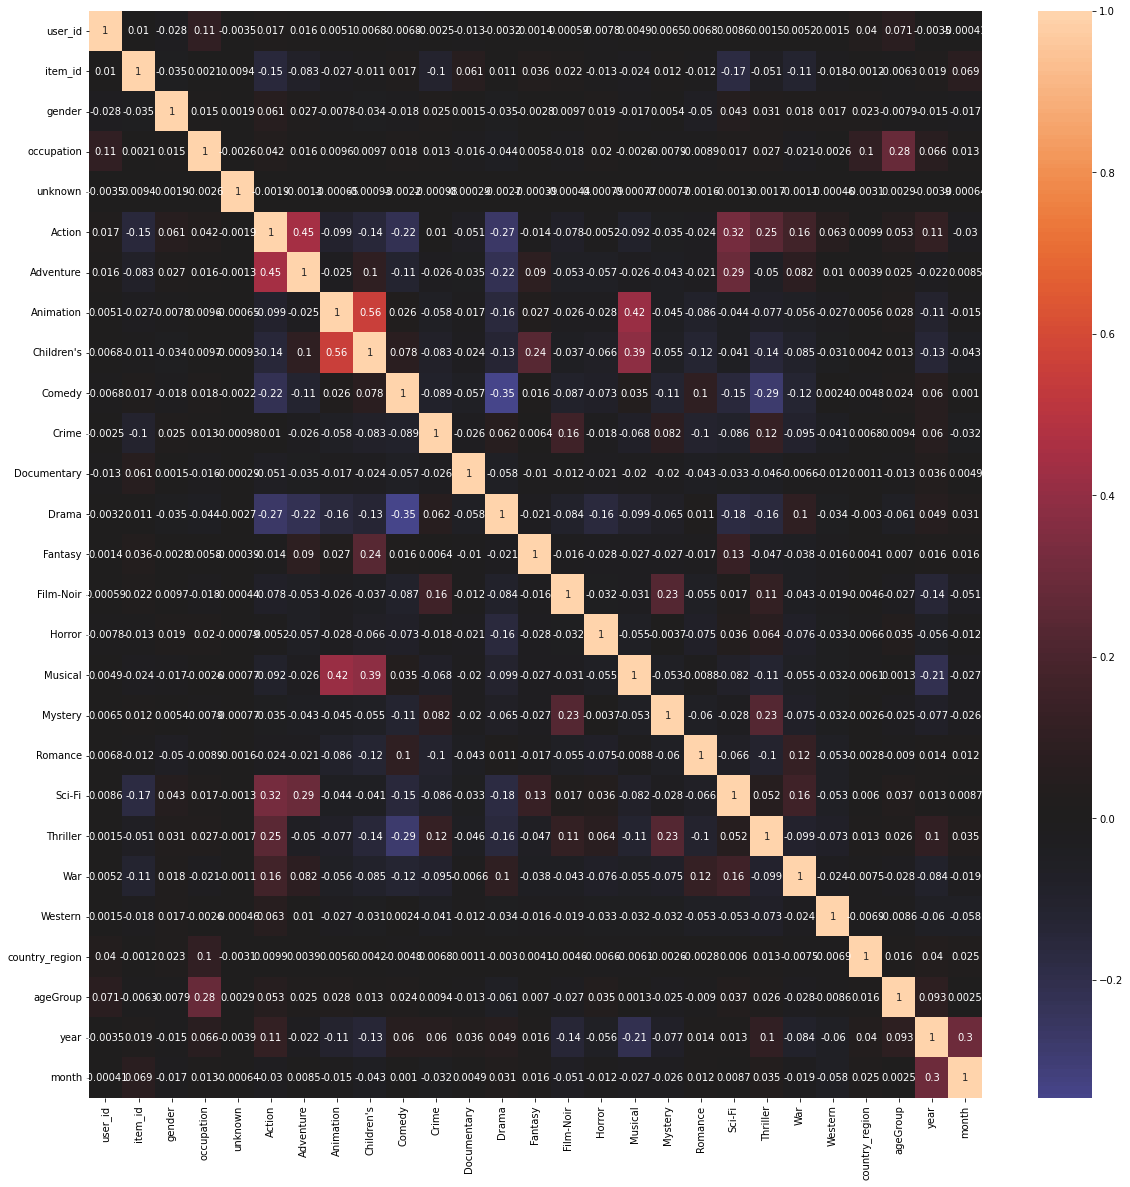

In [13]:
plt.figure(figsize=(20, 20))
sns.heatmap(encodeNscale(user_item_train).corr(), annot=True, center=0)

# Lasso to perform feature selection

In [52]:
user_item_train

,user_id,item_id,gender,occupation,unknown,Action,Adventure,Animation,Children's,Comedy,...,Romance,Sci-Fi,Thriller,War,Western,like,country_region,ageGroup,year,month
0,1,1,1,19,0,0,0,1,1,1,...,0,0,0,0,0,1,8,3,1995,1
1,2,1,0,13,0,0,0,1,1,1,...,0,0,0,0,0,1,9,1,1995,1
2,6,1,1,6,0,0,0,1,1,1,...,0,0,0,0,0,1,9,2,1995,1
3,10,1,1,9,0,0,0,1,1,1,...,0,0,0,0,0,1,9,1,1995,1
4,13,1,1,3,0,0,0,1,1,1,...,0,0,0,0,0,0,2,1,1995,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90565,863,1679,1,18,0,0,0,0,0,0,...,1,0,1,0,0,0,6,3,1998,2
90566,863,1680,1,18,0,0,0,0,0,0,...,1,0,0,0,0,0,6,3,1998,1
90567,883,1656,1,10,0,0,0,0,0,1,...,1,0,0,0,0,1,5,1,1998,2
90568,896,1681,1,20,0,0,0,0,0,1,...,0,0,0,0,0,0,9,3,1994,1


0.06516088695334799
[('Constant', 0.551), ('user_id', -0.0), ('item_id', -0.071), ('gender', -0.0), ('occupation', -0.0), ('unknown', -0.0), ('Action', -0.0), ('Adventure', -0.0), ('Animation', 0.0), ("Children's", -0.014), ('Comedy', -0.003), ('Crime', 0.0), ('Documentary', 0.005), ('Drama', 0.041), ('Fantasy', -0.0), ('Film-Noir', 0.007), ('Horror', -0.008), ('Musical', -0.0), ('Mystery', 0.0), ('Romance', 0.004), ('Sci-Fi', -0.0), ('Thriller', 0.0), ('War', 0.007), ('Western', -0.0), ('country_region', 0.0), ('ageGroup', -0.0), ('year', -0.065), ('month', -0.0)]


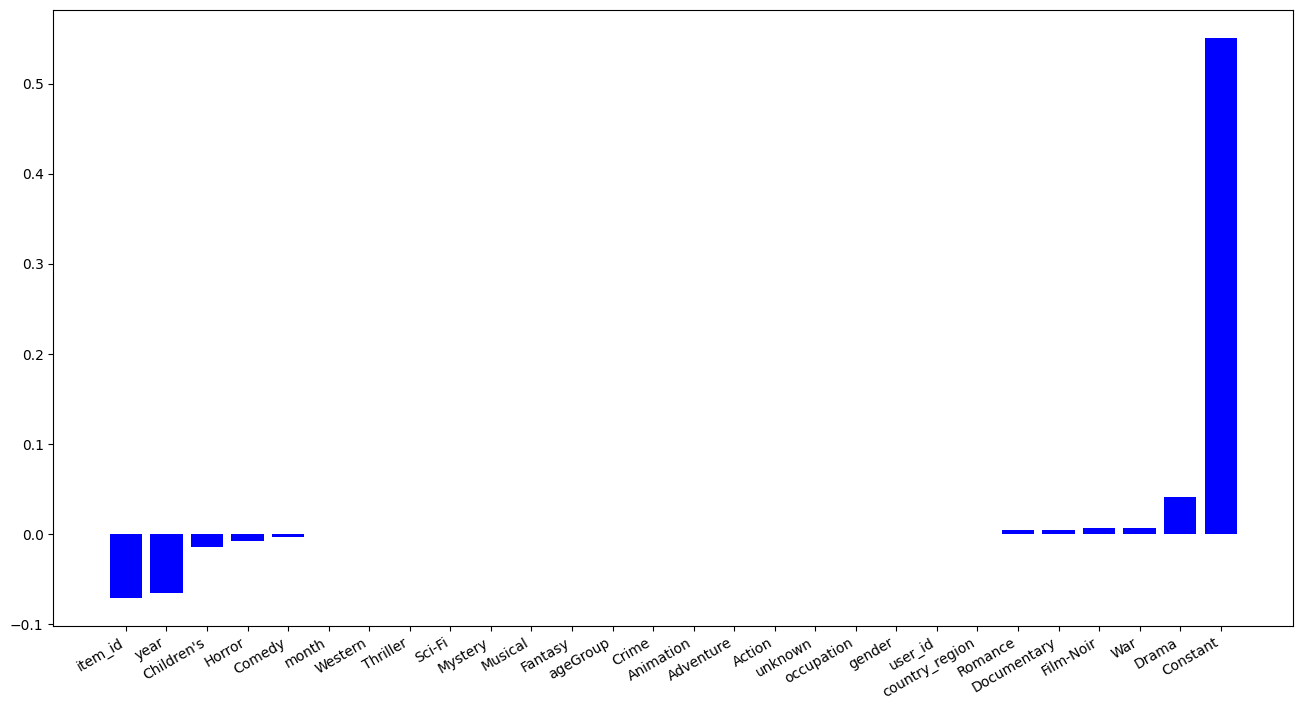

In [53]:
from sklearn.linear_model import Lasso


y = user_item_train['like']
X = encodeNscale(user_item_train)

lm = Lasso(alpha=0.01)
lm.fit(X,y)
y_pred = lm.predict(X)

from sklearn.metrics import r2_score
print(r2_score(y_true=y,y_pred=y_pred))

# Get the coefficients and intercept from the linear regression model
model_parameter = list(lm.coef_)  # Coefficients of features
model_parameter.insert(0, lm.intercept_)  # Intercept

# Round the coefficients and intercept to three decimal places
model_parameter = [round(x, 3) for x in model_parameter]

# Get the list of column names from the feature matrix
col = list(X.columns)

# Insert 'Constant' as the first element in the list of column names
col.insert(0, 'Constant')

# Combine the column names and corresponding model parameters using zip
parameter_summary = list(zip(col, model_parameter))
print(parameter_summary)

# Get the indices that would sort the model_parameter array
index = np.argsort(model_parameter)

# Sort the column names and model parameters based on the sorted indices
col, model_parameter = np.array(col)[index], np.array(model_parameter)[index]

# Create a figure for the bar plot
plt.figure(figsize=(16, 8))

# Create a bar plot to visualize the learned parameters
plt.bar(np.arange(len(col)), model_parameter, color='blue')

# Set x-axis ticks and labels
plt.xticks(np.arange(len(col)), col, rotation=30, ha='right')

# Display the plot
plt.show()

# SVM testing for model selection



In [17]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split

#use grid search on validation dataset to select the best kernal and C
kernal = ['linear','rbf','poly','sigmoid']
C = [0.1, 1, 0.01, 10]

for k in kernal:
    for c in C:
        svc = SVC(kernel=k, probability=True, random_state=27, C=c)

        # select a portion of full data for model testing and tuning
        y = user_item_train['like'][::10]
        x = encodeNscale(user_item_train)[::10]
        x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

        svc.fit(x_train, y_train)
        print("kernal: ", k)
        print("C: ", c)
        # Calculate and print the accuracy score on the training data
        train_accuracy = svc.score(x_train, y_train)
        print("Training Accuracy:", train_accuracy)

        # Calculate and print the accuracy score on the validation data
        test_accuracy = svc.score(x_val, y_val)
        print("Validation Accuracy:", test_accuracy)

        y_svc_pred2 = svc.predict_proba(x_val)
        fpr, tpr, thresholds = roc_curve(y_val, y_svc_pred2[:, 1])
        j_score = tpr-fpr
        optimal_threshold = thresholds[np.argmax(j_score)]
        print("Youden's Index:", max(j_score))
        print("thresholds:" , optimal_threshold)
        preds = np.where(y_svc_pred2[:, 1]>optimal_threshold, 1, 0)
        print (classification_report(y_val, preds))

#based on the grid search result, the best criteria is: kernel = rbf, C = 1 (default) 

kernal:  linear
C:  0.1
Training Accuracy: 0.6091938155715074
Validation Accuracy: 0.6214128035320088
Youden's Index: 0.2303771409342169
thresholds: 0.5882449328164248
              precision    recall  f1-score   support

           0       0.53      0.72      0.61       794
           1       0.70      0.51      0.59      1018

    accuracy                           0.60      1812
   macro avg       0.62      0.61      0.60      1812
weighted avg       0.63      0.60      0.60      1812

kernal:  linear
C:  1
Training Accuracy: 0.6097459966869133
Validation Accuracy: 0.6203090507726269
Youden's Index: 0.2310328445660727
thresholds: 0.5929546744146309
              precision    recall  f1-score   support

           0       0.53      0.73      0.62       794
           1       0.70      0.50      0.58      1018

    accuracy                           0.60      1812
   macro avg       0.62      0.62      0.60      1812
weighted avg       0.63      0.60      0.60      1812

kernal:  lin

In [16]:
svc = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=27)

# Fit the model on the training data
y_train = user_item_train['like'][::10]
x_train = encodeNscale(user_item_train)[::10]

y_test = user_item_test['like']
x_test = encodeNscale(user_item_test)


svc.fit(x_train, y_train)

print('rbf with balanced class weight')
# Calculate and print the accuracy score on the training data
train_accuracy = svc.score(x_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate and print the accuracy score on the test data
test_accuracy = svc.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)

y_svc_pred2 = svc.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_svc_pred2[:, 1])
j_score = tpr-fpr
optimal_threshold = thresholds[np.argmax(j_score)]
print("Youden's Index:", max(j_score))
print("thresholds:" , optimal_threshold)
preds = np.where(y_svc_pred2[:, 1]>optimal_threshold, 1, 0)
print (classification_report(y_test, preds))
    
    
#print(classification_report(y_test  , svc.predict(x_test)))

rbf with balanced class weight
Training Accuracy: 0.6654151943462897
Test Accuracy: 0.6176688938381588
Youden's Index: 0.23793300517647653
thresholds: 0.5468402038401005
              precision    recall  f1-score   support

           0       0.54      0.63      0.58      3961
           1       0.69      0.61      0.65      5468

    accuracy                           0.62      9429
   macro avg       0.62      0.62      0.61      9429
weighted avg       0.63      0.62      0.62      9429



## SVM Model Choice: RBF with balanced class weight 
- why Youden Index to make final judegement 
    - minized fpr as we dont want to recommend user movies they might dislike
- Justification: highest Youden Index 


# SVM with full data with RBF


In [ ]:
svc = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=27)

# Fit the model on the training data
y_train = user_item_train['like']

x_train = encodeNscale(user_item_train)

y_test = user_item_test['like']
x_test = encodeNscale(user_item_test)

svc.fit(x_train, y_train)

print('rbf with balanced class weight')
# Calculate and print the accuracy score on the training data
train_accuracy = svc.score(x_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate and print the accuracy score on the test data
test_accuracy = svc.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)

y_svc_pred2 = svc.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_svc_pred2[:, 1])
j_score = tpr-fpr
print("Youden's Index:", max(j_score))
    
    
print(classification_report(y_test  , svc.predict(x_test)))

rbf with balanced class weight
Training Accuracy: 0.6492524128183043
Test Accuracy: 0.6264715240216354
Youden's Index: 0.2558737467188777
              precision    recall  f1-score   support

           0       0.55      0.62      0.58      3961
           1       0.70      0.63      0.66      5468

    accuracy                           0.63      9429
   macro avg       0.62      0.63      0.62      9429
weighted avg       0.64      0.63      0.63      9429



In [18]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve
import pickle

#adjust model threshold using Youden's index
svm = pickle.load(open('SVM_rbf_balanced.pickle', "rb"))
y_test = user_item_test['like']
x_test = encodeNscale(user_item_test)
y_pred_prob = svm.predict_proba(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
j_score = tpr-fpr
optimal_threshold = thresholds[np.argmax(j_score)]

preds = np.where(y_pred_prob[:, 1]>optimal_threshold, 1, 0)
test_accuracy = accuracy_score(y_test, preds)
print("Test Accuracy:", test_accuracy)
print(classification_report(y_test, preds))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.2.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Test Accuracy: 0.624774631456146
              precision    recall  f1-score   support

           0       0.54      0.65      0.59      3961
           1       0.70      0.61      0.65      5468

    accuracy                           0.62      9429
   macro avg       0.62      0.63      0.62      9429
weighted avg       0.64      0.62      0.63      9429



## saved trained svm

In [ ]:
import pickle
#save model 
pickle.dump(svc, open('SVM_rbf_balanced.pickle',"wb"))

#load model 
loaded_model = pickle.load(open('SVM_rbf_balanced.pickle', "rb"))

# Neural Network

# Baseline Model to compare with

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split your data into training and testing sets
y_train = user_item_train['like']
X_train = encodeNscale(user_item_train)
y_test = user_item_test['like']
X_test = encodeNscale(user_item_test)

# Create an MLP Classifier
mlp = MLPClassifier(random_state=42)
clf = mlp.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the best parameters
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.6298653091526143
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.51      0.54      3961
           1       0.67      0.71      0.69      5468

    accuracy                           0.63      9429
   macro avg       0.62      0.61      0.61      9429
weighted avg       0.63      0.63      0.63      9429



In [37]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.6694073312778349


In [38]:
(2 * accuracy * precision) / (accuracy + precision)

0.6490346098947358

## Fine Tuning

In [34]:
from sklearn.metrics import precision_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
from warnings import filterwarnings
filterwarnings('ignore')
    
y_train = user_item_train['like'][::10]
X_train = encodeNscale(user_item_train)[::10]

# F1-score
def custom_scorer(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return (2 * accuracy * precision) / (accuracy + precision)
def custom_scoring_function(estimator, X, y):
    y_pred = estimator.predict(X) 
    custom_score = custom_scorer(y, y_pred)
    return custom_score

# Define your parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(10, 2), (20, 2), (10, 5), (20, 5)],
    'activation': ['relu', 'identity', 'logistic', 'tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [100, 1000, 10000]
}
mlp = MLPClassifier(random_state=42)
# Create a GridSearchCV object with custom scoring function
grid_search = GridSearchCV(mlp, param_grid, n_jobs=-1, scoring=custom_scoring_function, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Train the best MLP Classifier using the entire training data
best_mlp = MLPClassifier(**best_params, random_state=42)
best_mlp.fit(X_train, y_train)

# Perform cross-validation to evaluate the model
cross_val_scores = cross_val_score(best_mlp, X_train, y_train, cv=5, scoring=custom_scoring_function)
mean_cross_val_score = cross_val_scores.mean()
accuracy_scores = cross_val_score(best_mlp, X_train, y_train, cv=5, scoring='accuracy')
precision_scores = cross_val_score(best_mlp, X_train, y_train, cv=5, scoring='precision')
print("Best parameters:", best_params)
print("Cross-Validation Score:", mean_cross_val_score)
print("Accuracy:", accuracy_scores)
print("Precision:", precision_scores)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) 

Best parameters: {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 2), 'max_iter': 100, 'solver': 'adam'}
Cross-Validation Score: 0.585199597862235
Accuracy: [0.54856512 0.57537272 0.50082827 0.62727775 0.50138045]
Precision: [0.54927954 0.57198953 0.54356846 0.6426618  0.91262136]


## MLP Full Data

In [39]:
y_train = user_item_train['like']
X_train = encodeNscale(user_item_train)
y_test = user_item_test['like']
X_test = encodeNscale(user_item_test)

# Create an MLP Classifier
mlp = MLPClassifier(random_state=42, max_iter=100, solver = "adam", alpha=0.0001, activation="identity", hidden_layer_sizes=(20, 2))
mlp.fit(X_train, y_train)
# Make predictions on the test data
y_pred = mlp.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Classification Report:\n", report)

Accuracy: 0.610775267790858
Precision: 0.6536752136752136
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.49      0.51      3961
           1       0.65      0.70      0.68      5468

    accuracy                           0.61      9429
   macro avg       0.60      0.59      0.59      9429
weighted avg       0.61      0.61      0.61      9429



In [40]:
(2 * accuracy * precision) / (accuracy + precision)

0.6314974916499928

In [41]:
import pickle
#save model 
pickle.dump(mlp, open('mlp2.pkl',"wb"))

## Neural Network using pytorch

# Fine Tuning with Cross-validation

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold  # Import StratifiedKFold
from sklearn.model_selection import train_test_split

class MLP(nn.Module):
    def __init__(self, input_size, hidden_layer_sizes, activations):
        super(MLP, self).__init__()
        layers = []

        # Input layer
        layers.append(nn.Linear(input_size, hidden_layer_sizes[0]))
        layers.append(activations[0])

        # Hidden layers
        for i in range(len(hidden_layer_sizes) - 1):
            layers.append(nn.Linear(hidden_layer_sizes[i], hidden_layer_sizes[i + 1]))
            layers.append(activations[i + 1])

        # Output layer
        layers.append(nn.Linear(hidden_layer_sizes[-1], 1))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

X, y = np.array(encodeNscale(user_item_train), dtype=np.float32),np.array(user_item_train['like'], dtype=np.float32)

# Set up hyperparameter combinations for manual grid search
hidden_layer_sizes_combinations = [(20, 10), (30, 20, 10), (20, 15, 10), (10, 5), (20, 5)]
activations_combinations = [(nn.Tanh(), nn.ReLU()), (nn.ReLU(), nn.Tanh(), nn.Sigmoid()), (nn.Tanh(), nn.Sigmoid(), nn.ReLU()), (nn.Sigmoid(), nn.ReLU())]
epochs = 100
learning_rate = 0.001
input_size = 27
# Create lists to store results
best_accuracy = 0
best_model = None
best_hyperparameters = None

# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  

# Perform cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_val =  X[train_index],  X[test_index]
    y_train, y_val = y[train_index], y[test_index]

    for hidden_layer_sizes in hidden_layer_sizes_combinations:
        for activations in activations_combinations:
            if len(hidden_layer_sizes) == len(activations):
                model = MLP(input_size, hidden_layer_sizes, activations)

                # Define loss function and optimizer
                criterion = nn.BCEWithLogitsLoss()
                optimizer = optim.Adam(model.parameters(), lr=learning_rate)

                # Training loop
                for epoch in range(epochs):
                    optimizer.zero_grad()
                    outputs = model(torch.tensor(X_train, dtype=torch.float32))
                    loss = criterion(outputs, torch.tensor(y_train, dtype=torch.float32).unsqueeze(1))
                    loss.backward()
                    optimizer.step()

                # Make predictions on the validation set
                with torch.no_grad():
                    predictions = (model(torch.tensor(X_val, dtype=torch.float32)) > 0).squeeze().numpy()

                # Evaluate the model
                accuracy = accuracy_score(y_val, predictions)

                # find the best accuracy
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_model = model
                    best_hyperparameters = {
                        'hidden_layer_sizes': hidden_layer_sizes,
                        'activations': activations,
                        'epochs': epochs,
                        'learning_rate': learning_rate
                    }

print("Best hyperparameters:", best_hyperparameters)
print("Best Accuracy:", best_accuracy)


Best hyperparameters: {'hidden_layer_sizes': (30, 20, 10), 'activations': (Tanh(), Sigmoid(), ReLU()), 'epochs': 100, 'learning_rate': 0.001}
Best Accuracy: 0.6334824140025399


## Train with Full Data

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, precision_score

# Define your custom neural network class
class MLP(nn.Module):
    def __init__(self, input_size, hidden_layer_sizes, activations):
        super(MLP, self).__init__()
        layers = []

        # Input layer
        layers.append(nn.Linear(input_size, hidden_layer_sizes[0]))
        layers.append(activations[0])

        # Hidden layers
        for i in range(len(hidden_layer_sizes) - 1):
            layers.append(nn.Linear(hidden_layer_sizes[i], hidden_layer_sizes[i + 1]))
            layers.append(activations[i + 1])

        # Output layer
        layers.append(nn.Linear(hidden_layer_sizes[-1], 1))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

X_train = torch.tensor(np.array(encodeNscale(user_item_train), dtype=np.float32),dtype=torch.float32)
y_train = torch.tensor(user_item_train['like'], dtype=torch.float32)
X_test = torch.tensor(np.array(encodeNscale(user_item_test), dtype=np.float32),dtype=torch.float32)

input_size = 27  
hidden_layer_sizes = [30,20,10]  
activation = (nn.Tanh(), nn.Sigmoid(), nn.ReLU())
model_mlp = MLP(input_size, hidden_layer_sizes, activation)
criterion = nn.BCEWithLogitsLoss() 
optimizer = optim.Adam(model_mlp.parameters(), lr=0.001)
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model_mlp(X_train)
    loss = criterion(outputs, y_train.unsqueeze(1))
    loss.backward()
    optimizer.step()
with torch.no_grad():
    predictions = (model_mlp(X_test) > 0).squeeze().numpy()
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
precision = precision_score(y_test, predictions)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Classification Report:\n", report)


Accuracy: 0.6142751087071799
Precision: 0.6552484314057996
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.49      0.51      3961
           1       0.66      0.71      0.68      5468

    accuracy                           0.61      9429
   macro avg       0.60      0.60      0.60      9429
weighted avg       0.61      0.61      0.61      9429



In [24]:
import joblib
joblib.dump(model_mlp, "mlp_pytorch.pkl")

['mlp_pytorch.pkl']